## Missing data and aggregations
- in real world data, there will be missing data and or unwanted distrubance data

In [61]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 10

# create dummy data
random_matrix = np.random.randint(1, 10, [n, n])    # 2D array - matrix
index = np.random.choice(random_matrix.size, 10, replace=False)
print(index)

random_matrix = random_matrix * 1.0
random_matrix.ravel()[index] = None




[ 9 84  6 39 92 33 68 85 20 17]


In [62]:
random_matrix

array([[ 7.,  4.,  8.,  5.,  7.,  3., nan,  8.,  5., nan],
       [ 8.,  8.,  3.,  6.,  5.,  2.,  8., nan,  2.,  5.],
       [nan,  6.,  9.,  1.,  3.,  7.,  4.,  9.,  3.,  5.],
       [ 3.,  7.,  5., nan,  7.,  2.,  4.,  9.,  2., nan],
       [ 5.,  2.,  4.,  7.,  8.,  3.,  1.,  4.,  2.,  8.],
       [ 4.,  2.,  6.,  6.,  4.,  6.,  2.,  2.,  4.,  8.],
       [ 7.,  9.,  8.,  5.,  2.,  5.,  8.,  9., nan,  1.],
       [ 9.,  7.,  9.,  8.,  1.,  8.,  8.,  3.,  1.,  8.],
       [ 3.,  3.,  1.,  5., nan, nan,  7.,  9.,  8.,  2.],
       [ 1.,  7., nan,  8.,  5.,  3.,  8.,  6.,  3.,  1.]])

In [63]:
scores = pd.DataFrame(random_matrix,
                    index=[f"Player {i}" for i in range(1, n+1)],
                    columns=[f"Rounds {i}" for i in range(1, n+1)]
                    )
scores

,Rounds 1,Rounds 2,Rounds 3,Rounds 4,Rounds 5,Rounds 6,Rounds 7,Rounds 8,Rounds 9,Rounds 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player 3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,NaN,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,NaN,NaN,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,NaN,8.0,5.0,3.0,8.0,6.0,3.0,1.0


In [64]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player 1 to Player 10
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rounds 1   9 non-null      float64
 1   Rounds 2   10 non-null     float64
 2   Rounds 3   9 non-null      float64
 3   Rounds 4   9 non-null      float64
 4   Rounds 5   9 non-null      float64
 5   Rounds 6   9 non-null      float64
 6   Rounds 7   9 non-null      float64
 7   Rounds 8   9 non-null      float64
 8   Rounds 9   9 non-null      float64
 9   Rounds 10  8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


## Missing
- isnull() - returns True if null
- notnull() - returns True if not null
- dropna() - drops an axis with nulls
- nillna() - fills the null values with certain value

In [65]:
scores.isnull()

,Rounds 1,Rounds 2,Rounds 3,Rounds 4,Rounds 5,Rounds 6,Rounds 7,Rounds 8,Rounds 9,Rounds 10
Player 1,False,False,False,False,False,False,True,False,False,True
Player 2,False,False,False,False,False,False,False,True,False,False
Player 3,True,False,False,False,False,False,False,False,False,False
Player 4,False,False,False,True,False,False,False,False,False,True
Player 5,False,False,False,False,False,False,False,False,False,False
Player 6,False,False,False,False,False,False,False,False,False,False
Player 7,False,False,False,False,False,False,False,False,True,False
Player 8,False,False,False,False,False,False,False,False,False,False
Player 9,False,False,False,False,True,True,False,False,False,False
Player 10,False,False,True,False,False,False,False,False,False,False


In [66]:
scores.notnull()

,Rounds 1,Rounds 2,Rounds 3,Rounds 4,Rounds 5,Rounds 6,Rounds 7,Rounds 8,Rounds 9,Rounds 10
Player 1,True,True,True,True,True,True,False,True,True,False
Player 2,True,True,True,True,True,True,True,False,True,True
Player 3,False,True,True,True,True,True,True,True,True,True
Player 4,True,True,True,False,True,True,True,True,True,False
Player 5,True,True,True,True,True,True,True,True,True,True
Player 6,True,True,True,True,True,True,True,True,True,True
Player 7,True,True,True,True,True,True,True,True,False,True
Player 8,True,True,True,True,True,True,True,True,True,True
Player 9,True,True,True,True,False,False,True,True,True,True
Player 10,True,True,False,True,True,True,True,True,True,True


In [67]:
scores.dropna()

,Rounds 1,Rounds 2,Rounds 3,Rounds 4,Rounds 5,Rounds 6,Rounds 7,Rounds 8,Rounds 9,Rounds 10
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0


In [68]:
scores.dropna(axis=1)

,Rounds 2
Player 1,4.0
Player 2,8.0
Player 3,6.0
Player 4,7.0
Player 5,2.0
Player 6,2.0
Player 7,9.0
Player 8,7.0
Player 9,3.0
Player 10,7.0


In [69]:
# how to treat NaNs?
# it depends on the situation
# often need to talk to domain experts

scores.fillna(0)    # in this case - may be resonable to set NaN to 0

,Rounds 1,Rounds 2,Rounds 3,Rounds 4,Rounds 5,Rounds 6,Rounds 7,Rounds 8,Rounds 9,Rounds 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player 3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## Missing value strategy

Strategy depends on:
- dataset size
- valuable information (some row, some columns)
- percentage missing values
- domain knowledge
- missing values can impact
    - data visualization
    - aritmetic computations
    - summary statistics
    - machine learning algortihms

In [70]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [71]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

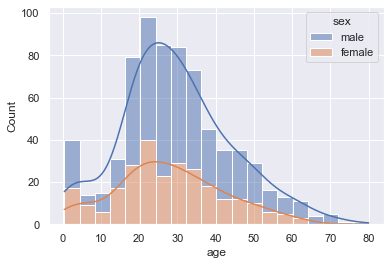

In [122]:
# focus on age

sns.histplot(data=titanic, x="age", kde=True, hue="sex", multiple="stack")

In [143]:
# talked to a titanic historian
# this dude says: use median age of corresponding gender to fill ages

print(f"Number of males: {np.sum(titanic['sex'] == 'male')}")
print(f"Number of females: {np.sum(titanic['sex'] == 'female')}")

median_male_age = titanic.loc[titanic["sex"] == "male", "age"].median()
median_female_age = titanic.loc[titanic["sex"] == "female", "age"].median()

median_male_age, median_female_age

Number of males: 577
Number of females: 314


(29.0, 27.0)

In [151]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)
titanic.loc[titanic["sex"] == "female", "age"] = titanic.loc[titanic["sex"] == "female", "age"].fillna(median_female_age)
titanic.loc[titanic["age"] == 29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [155]:
titanic.isnull().sum()["age"]

0

<AxesSubplot:xlabel='age', ylabel='Count'>

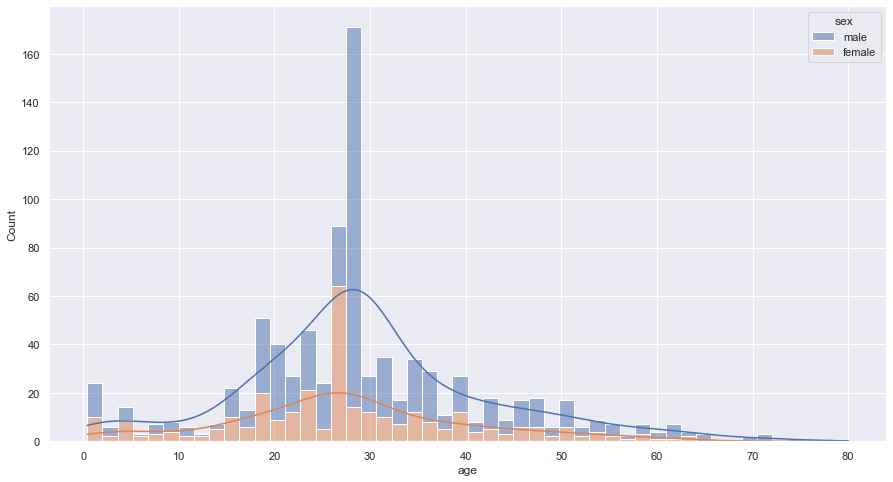

In [162]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=titanic, x="age", kde=True, multiple="stack", hue="sex", bins=50)


In [164]:
# groupby
titanic.groupby("sex").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.761146,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.355581,0.429809,0.235702,25.523893,0.930676,0.712305


In [166]:
titanic.groupby("sex").max()

C:\Users\chris\AppData\Local\Temp/ipykernel_6476/3636409492.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  titanic.groupby("sex").max()


,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


In [168]:
titanic.groupby("sex").mean()[["survived", "age"]]

,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581
